In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv("../data/sales_model_ready.csv")
df.head()
df.describe()

C:\Users\divya\AppData\Local\Temp\ipykernel_116496\2180907537.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/sales_model_ready.csv")


,Quantity,UnitPrice,Revenue,DayOfWeek,IsWeekend,Month,Hour,HolidaySeason,IsTopSeller,RollingRevenue7D,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
count,360534.000000,360534.000000,360534.000000,360534.000000,360534.000000,360534.000000,360534.000000,360534.000000,360534.000000,360534.000000,...,360534.000000,360534.000000,360534.000000,360534.000000,360534.000000,360534.000000,360534.000000,360534.000000,360534.000000,360534.000000
mean,7.614208,2.612069,11.690769,2.639668,0.165385,7.629416,12.778182,0.273453,0.026749,15.962034,...,0.000155,0.000025,0.000333,0.006224,0.000671,0.004188,0.000460,0.000161,0.902894,0.000652
std,8.966247,2.405306,8.741207,1.949859,0.371528,3.415724,2.254314,0.445732,0.161350,12.458966,...,0.012462,0.004996,0.018241,0.078647,0.025899,0.064581,0.021453,0.012683,0.296102,0.025522
min,1.000000,0.120000,0.120000,0.000000,0.000000,1.000000,6.000000,0.000000,0.000000,0.140000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.250000,4.160000,1.000000,0.000000,5.000000,11.000000,0.000000,0.000000,8.264286,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,4.000000,1.650000,10.200000,3.000000,0.000000,8.000000,13.000000,0.000000,0.000000,12.964286,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,12.000000,3.250000,17.000000,4.000000,0.000000,11.000000,14.000000,1.000000,0.000000,19.628571,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,112.000000,14.130000,39.950000,6.000000,1.000000,12.000000,20.000000,1.000000,1.000000,450.500000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Fill missing PrevDayRevenue values
df['PrevDayRevenue'].fillna(0, inplace=True)

# Log-transform skewed features
df['Quantity_log'] = np.log(df['Quantity'] + 1)
df['UnitPrice_log'] = np.log(df['UnitPrice'] + 1)

# Drop original skewed features and irrelevant ones
X = df.drop(columns=["StockCode", "Revenue", "Quantity", "UnitPrice"])

# Define target variable and log-transform it
y = np.log(df['Revenue'] + 3)

# Step 1: Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=100
)

# Step 2: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Polynomial transformation (degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Step 4: Train Linear Regression on polynomial features
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Step 5: Make predictions (log-scale)
y_pred_log = model.predict(X_test_poly)

# Step 6: Convert predictions back to original scale
y_pred = np.exp(y_pred_log) - 3
y_test_actual = np.exp(y_test) - 3

# Step 7: Evaluate model
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))
mae = mean_absolute_error(y_test_actual, y_pred)
r2 = r2_score(y_test_actual, y_pred)

print(f"RMSE: ₹{rmse:.2f}")
print(f"MAE: ₹{mae:.2f}")
print(f"R^2: {r2:.4f}")




C:\Users\divya\AppData\Local\Temp\ipykernel_116496\2000765576.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PrevDayRevenue'].fillna(0, inplace=True)


RMSE: ₹0.88
MAE: ₹0.47
R^2: 0.9898


In [4]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on training set
y_train_pred_log = model.predict(X_train_poly)
y_train_pred = np.exp(y_train_pred_log) - 3

# Predict on test set
y_test_pred_log = model.predict(X_test_poly)
y_test_pred = np.exp(y_test_pred_log) - 3

# Metrics for training set
train_rmse = np.sqrt(mean_squared_error(np.exp(y_train) - 3, y_train_pred))
train_mae = mean_absolute_error(np.exp(y_train) - 3, y_train_pred)
train_r2 = r2_score(np.exp(y_train) - 3, y_train_pred)

# Metrics for test set
test_rmse = np.sqrt(mean_squared_error(np.exp(y_test) - 3, y_test_pred))
test_mae = mean_absolute_error(np.exp(y_test) - 3, y_test_pred)
test_r2 = r2_score(np.exp(y_test) - 3, y_test_pred)

# Print comparison
print("Training Set Performance:")
print(f"  RMSE: ₹{train_rmse:.2f}")
print(f"  MAE: ₹{train_mae:.2f}")
print(f"  R^2: {train_r2:.4f}")
print("\nTest Set Performance:")
print(f"  RMSE: ₹{test_rmse:.2f}")
print(f"  MAE: ₹{test_mae:.2f}")
print(f"  R^2: {test_r2:.4f}")


Training Set Performance:
  RMSE: ₹0.87
  MAE: ₹0.46
  R^2: 0.9900

Test Set Performance:
  RMSE: ₹0.88
  MAE: ₹0.47
  R^2: 0.9898


No overfitting 

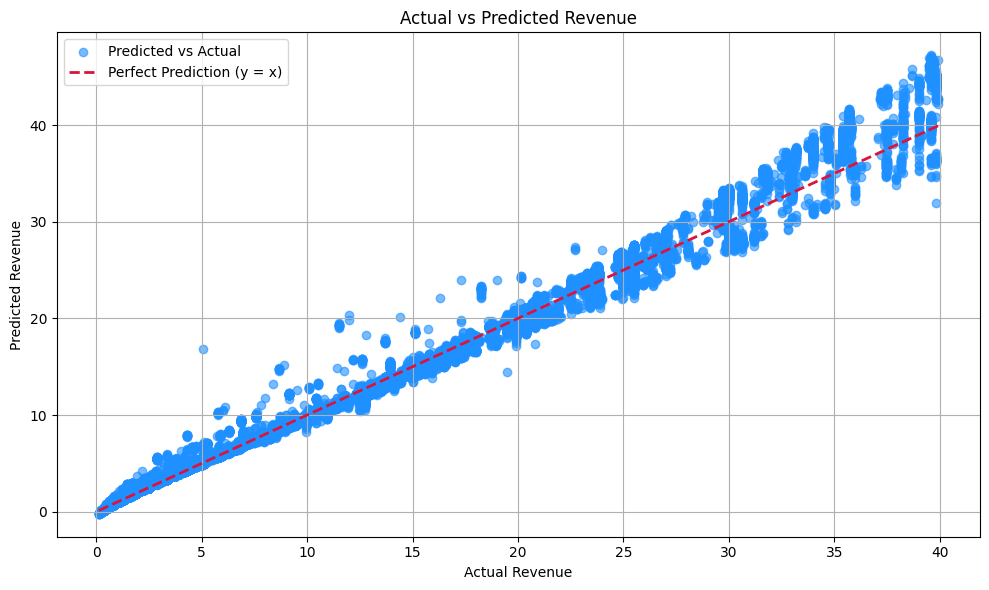

In [5]:
import matplotlib.pyplot as plt

# Get the actual y values in original scale
y_test_actual = np.exp(y_test) - 3

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test_actual, y_pred, color='dodgerblue', alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test_actual.min(), y_test_actual.max()],
         [y_test_actual.min(), y_test_actual.max()],
         color='crimson', linestyle='--', linewidth=2, label='Perfect Prediction (y = x)')

plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs Predicted Revenue')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('C:\\Users\\divya\\OneDrive\\Desktop\\dynamic_pricing_project\\reports/actual vs predicted revenue.png')
plt.show()


In [6]:
import joblib

joblib.dump(model, "../models/linear_regression_model.pkl")


['../models/linear_regression_model.pkl']

In [7]:
df['Revenue'].describe()



count    360534.000000
mean         11.690769
std           8.741207
min           0.120000
25%           4.160000
50%          10.200000
75%          17.000000
max          39.950000
Name: Revenue, dtype: float64

count    360534.000000
mean          2.498405
std           0.636767
min           1.137833
25%           1.968510
50%           2.580217
75%           2.995732
max           3.760037
Name: LogRevenue, dtype: float64


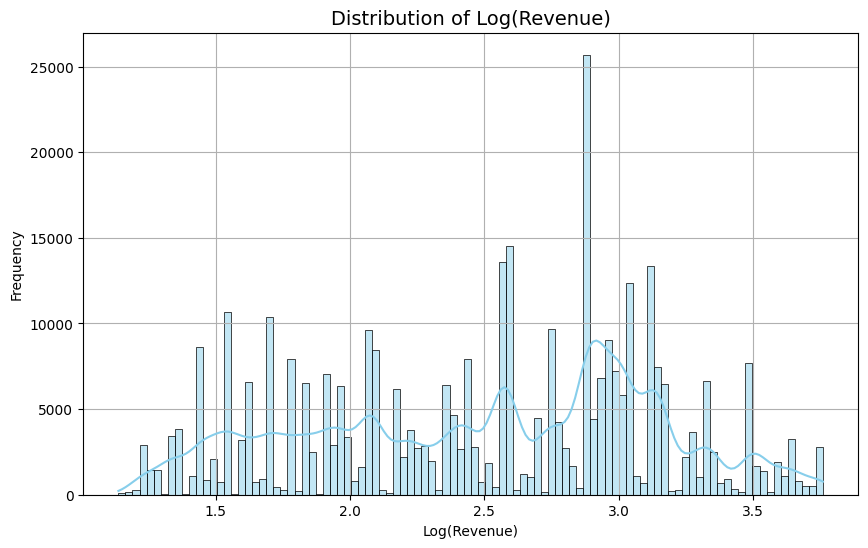

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new column for log-transformed revenue
df['LogRevenue'] = np.log(df['Revenue'] + 3) 

# Summary statistics
print(df['LogRevenue'].describe())

#Plot histogram of log revenue
plt.figure(figsize=(10, 6))
sns.histplot(df['LogRevenue'], bins=100, kde=True, color='skyblue')
plt.title('Distribution of Log(Revenue)', fontsize=14)
plt.xlabel('Log(Revenue)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
